In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [4]:
data = pd.read_csv("../kc_house_data.csv")
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


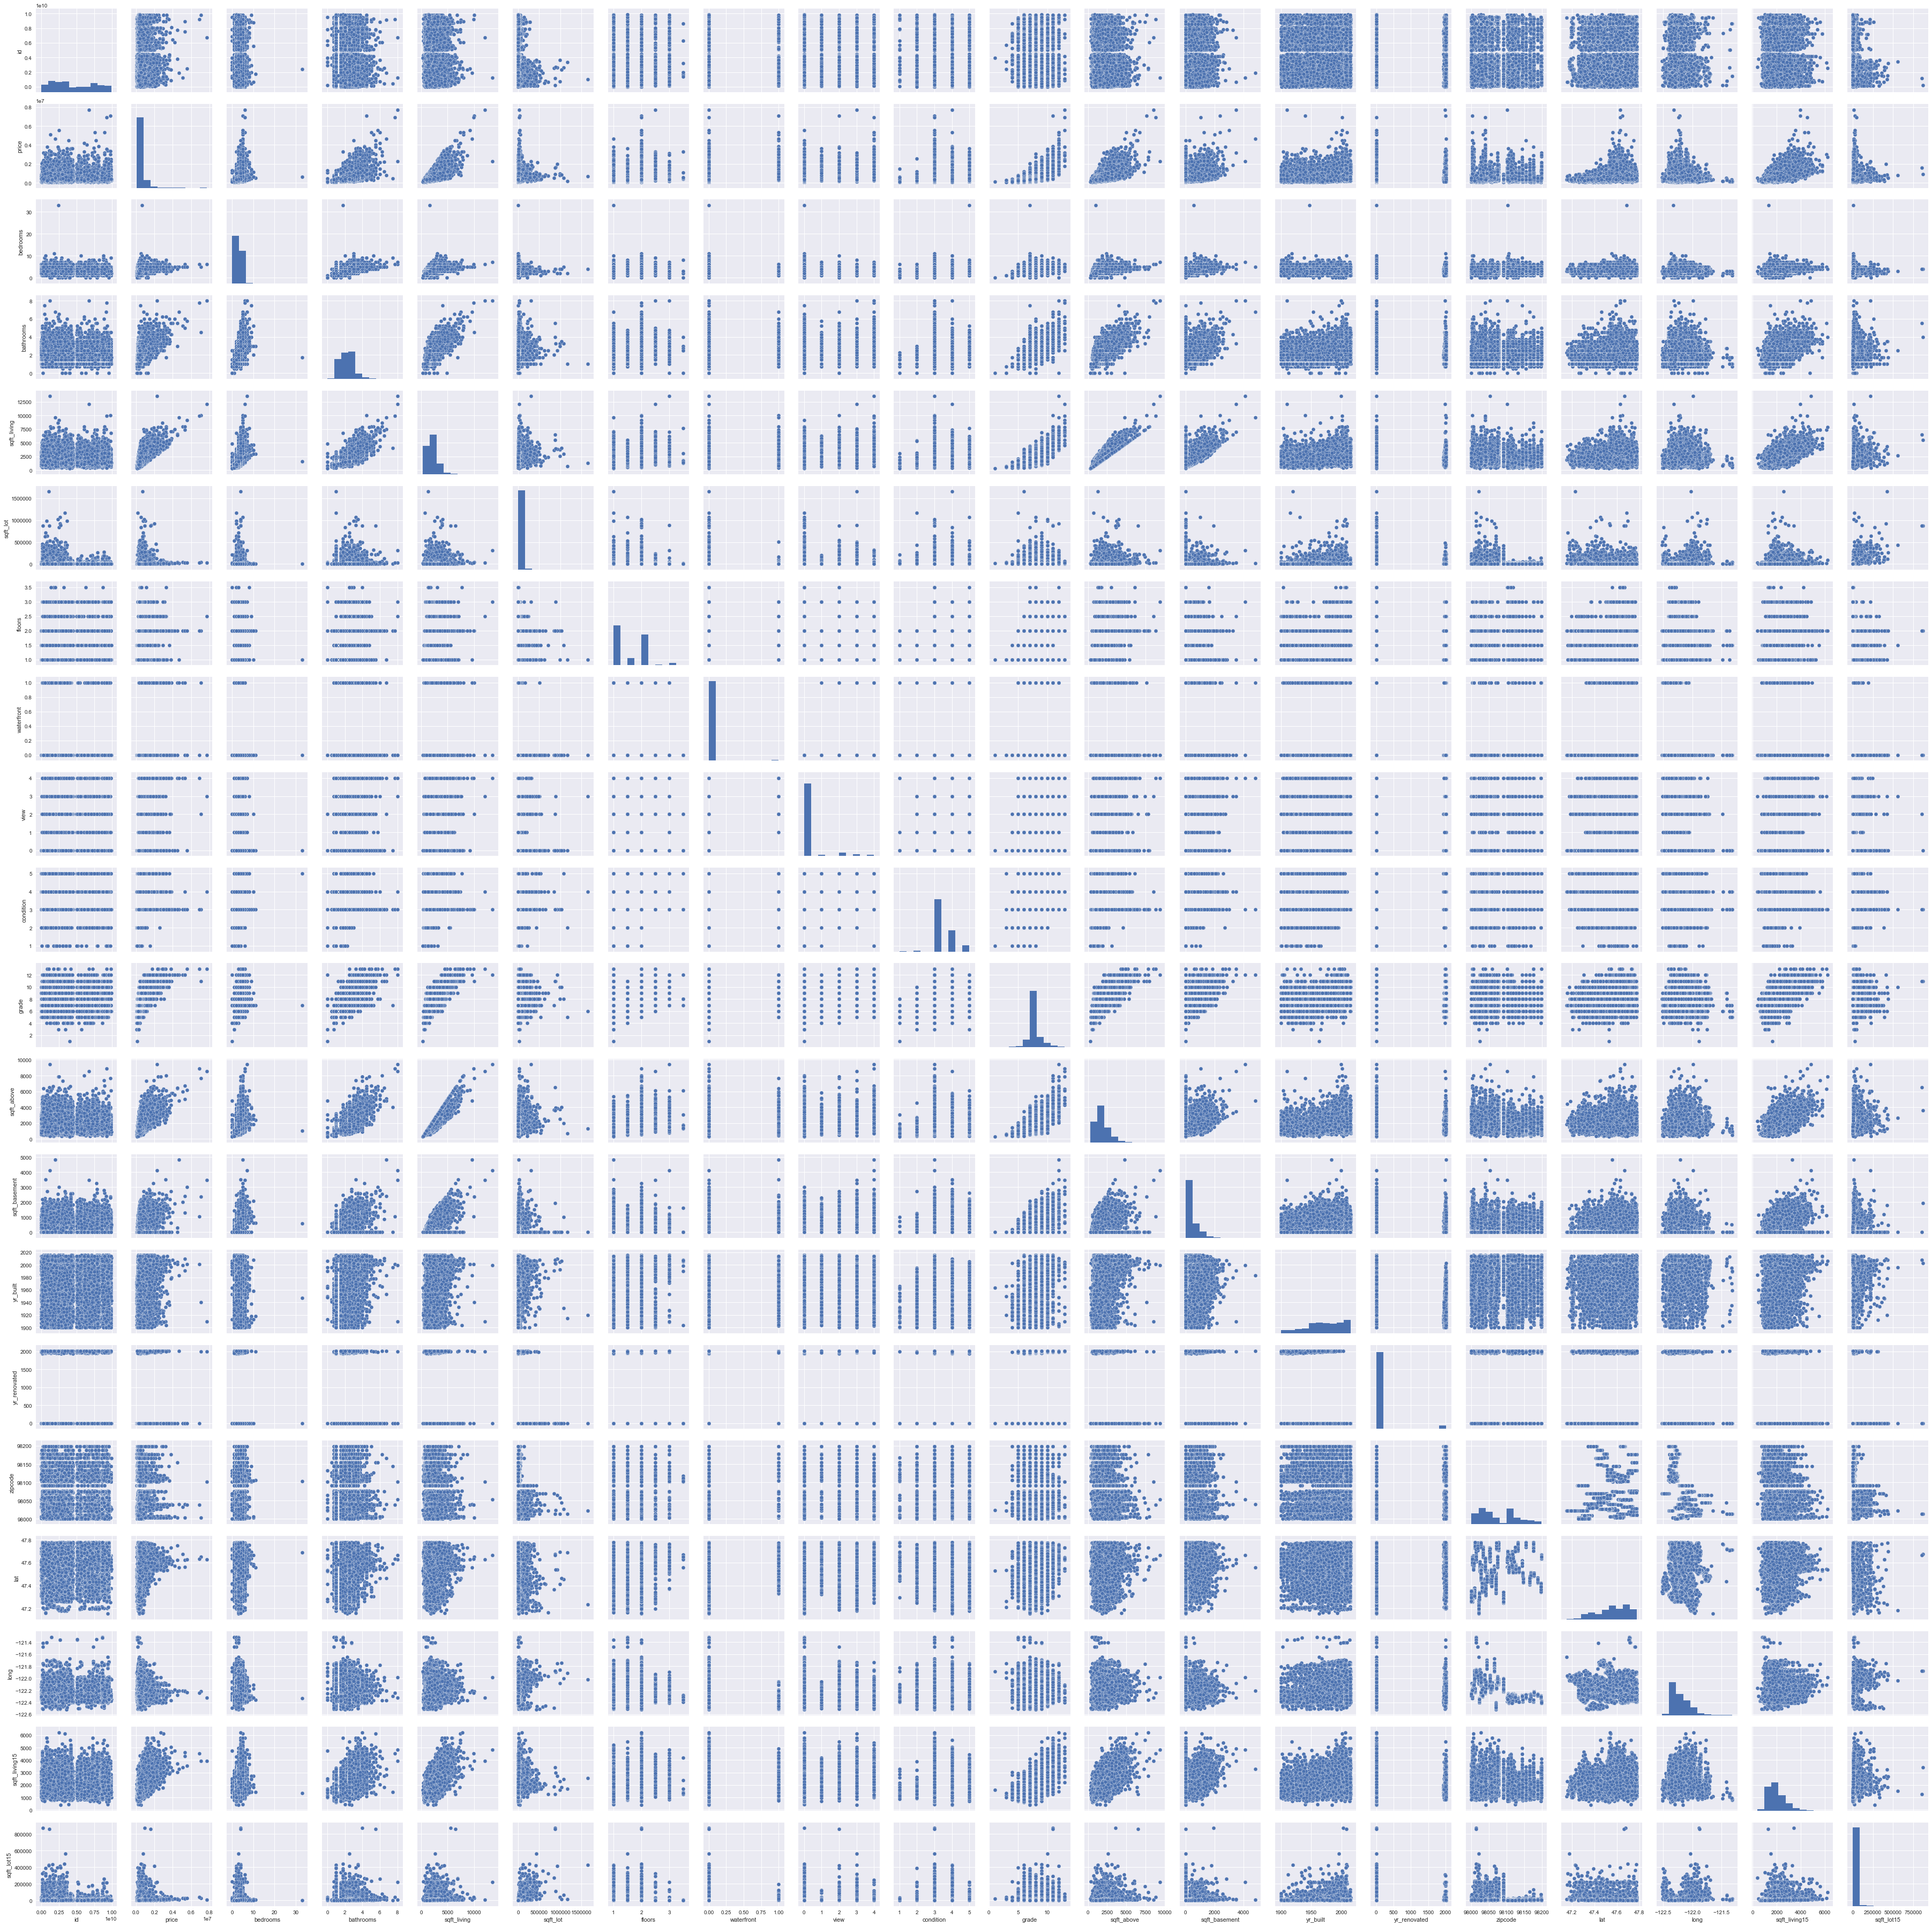

In [6]:
sns.set(color_codes=True)
sns.pairplot(data=data)

In [10]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

We have already seen Linear Regression with 1 variable and we fitted nice line on it

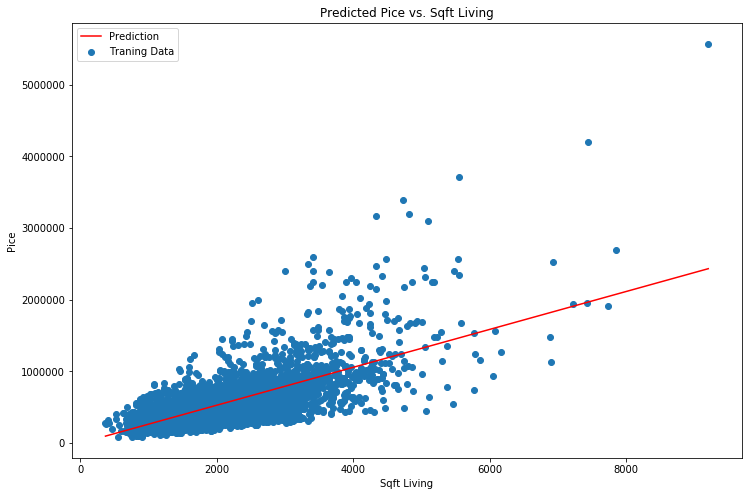

In [11]:
from IPython.display import Image
Image(filename='LinearRegImage.png')

We are now using 2 features sqft_living and bedrooms

In [15]:
df_data=data[['sqft_living','bedrooms','price']]

dataframe with price, we need to predict price using above features

In [13]:
#df_price=data[['price']]

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
train_data,test_data = train_test_split(df_data, test_size = 0.2,random_state=0)

In [19]:
train_data.head()

sqft_living  bedrooms     price
5268          1570         3  495000.0
16909         1780         3  635000.0
16123         1090         3  382500.0
12181         2210         4  382500.0
12617         1800         3  670000.0

In [23]:
Xtrain=train_data[['sqft_living','bedrooms']]
Ytrain=train_data[['price']]

In [26]:
Xtest=test_data[['sqft_living','bedrooms']]
Ytest=test_data[['price']]

Normalize features

In [28]:
Xtrain=(Xtrain- Xtrain.mean()) / Xtrain.std()

In [30]:
Xtrain.head()

sqft_living  bedrooms
5268     -0.553934 -0.390023
16909    -0.326475 -0.390023
16123    -1.073840 -0.390023
12181     0.139273  0.670275
12617    -0.304813 -0.390023



### Visualization helps a lot in understanding whats going on. This is just for understanding. Let us visualize training data

For more than 3 dimensions, it may be difficult to visualize. In this case, we have sqft_living, bedrooms and price

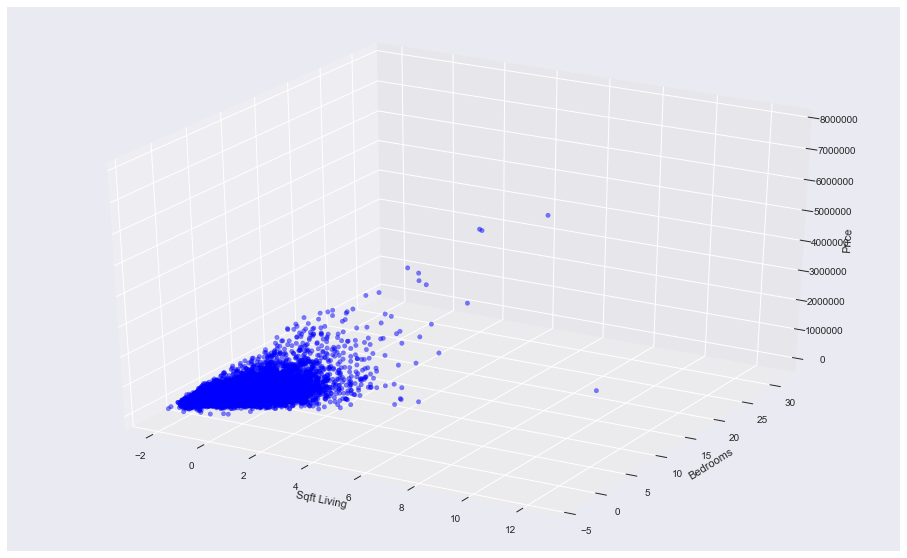

In [31]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtrain['sqft_living'],Xtrain['bedrooms'],Ytrain,c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

It seems Like there is Linear Positive Relationship.

Previously we were using only 1 feature to predict price, now we will use sqft_living and bedrooms to predict price.

Combine both dataframes to create single dataframe to work with

In [101]:
df_data=pd.concat([df_2features_normalized,df_price],axis=1)

In [102]:
df_data.head()

sqft_living  bedrooms     price
0    -0.979812 -0.398728  221900.0
1     0.533622 -0.398728  538000.0
2    -1.426221 -1.473925  180000.0
3    -0.130547  0.676469  604000.0
4    -0.435412 -0.398728  510000.0

Split data into training and testing. training data is used for training our model while test data will be used to see how our model works. In Machine Learning, we divide the dataset into 3 parts : training dataset, validation dataset and testing dataset. We will talk about validation dataset later on, right now we are only splitting our dataset into training and testing.

In [103]:
from sklearn.cross_validation import train_test_split

In [104]:
train_data,test_data = train_test_split(df_data, test_size = 0.2,random_state=0)

Check shape

In [105]:
print("train: ",train_data.shape)
print("test: ",test_data.shape)

train:  (17290, 3)
test:  (4323, 3)


In [106]:
Xtrain=np.array(train_data[['sqft_living','bedrooms']])
Ytrain=np.array(train_data['price'])

Xtest=np.array(test_data[['sqft_living','bedrooms']])
Ytest=np.array(test_data['price'])

In [107]:
print("X_train: ",Xtrain.shape, "Y_train: ",Ytrain.shape)
print("Y_test: ",Xtest.shape, "Y_test: ",Ytest.shape)

X_train:  (17290, 2) Y_train:  (17290,)
Y_test:  (4323, 2) Y_test:  (4323,)


In [108]:
Ytrain=np.expand_dims(Ytrain,axis=1)
Ytest=np.expand_dims(Ytest,axis=1)

In [109]:
Xtrain=np.c_[np.ones(Xtrain.shape[0]),Xtrain ]  
Xtest=np.c_[np.ones(Xtest.shape[0]),Xtest ] 

In [110]:
print("X_train: ",Xtrain.shape, "Y_train: ",Ytrain.shape)
print("Y_test: ",Xtest.shape, "Y_test: ",Ytest.shape)

X_train:  (17290, 3) Y_train:  (17290, 1)
Y_test:  (4323, 3) Y_test:  (4323, 1)


In [111]:
Xtrain[:5]

array([[ 1.        , -0.55517969, -0.39872792],
       [ 1.        , -0.32653134, -0.39872792],
       [ 1.        , -1.0778045 , -0.39872792],
       [ 1.        ,  0.14165339,  0.67646941],
       [ 1.        , -0.30475531, -0.39872792]])

We have already written vectorized code in previous notebook so this will work for any number of features

#### Hypothesis

In [112]:
def hypothesis(X,theta):
    hyp=np.dot(X,theta)
    return hyp

#### Cost/Error Function

In [113]:
def Cost(X, Y,  theta):
    
    N = Y.size
    cost = 0.0
    hyp=hypothesis(X,theta)
    cost = (1/(2*float(N)))*(np.sum(np.square(Y-hyp)))
    return(cost)

#### Gradient Descent

In [132]:
def GradientDescent(X, Y, theta, alpha=0.01, num_iters=200):
    N = Y.size
    history = np.zeros(num_iters)
    for i in np.arange(num_iters):
        h = hypothesis(X,theta)
        theta = theta - alpha*(-1/float(N))*(X.T.dot(Y-h))
        history[i] = Cost(X, Y, theta)
        print(history[i])
    return(theta, history)

In [133]:
print(Xtrain.T.shape)
print(Ytrain.shape)

(3, 17290)
(17290, 1)


In [134]:
theta=np.expand_dims(random.randn(3),axis=1)


In [135]:
theta.shape

(3, 1)

In [136]:
theta

array([[0.30375766],
       [0.57002675],
       [2.24285687]])

lets check error with random theta

In [137]:
Cost(Xtrain,Ytrain,theta)

216666658185.45978

Cost should go down with each iteration, this should indicate on the curve

212906466871.7828
209228427422.03033
205630642972.5917
202111263014.70755
198668482195.15894
195300539149.67844
192005715368.14926
188782334090.68607
185628759233.71823
182543394345.22083
179524681588.26624
176571100752.09103
173681168289.8989
170853436382.6409
168086492028.03912
165378956154.1396
162729482756.70163
160136758059.7519
157599499698.64996
155116455925.03265
152686404833.021
150308153606.09418
147980537784.05002
145702420549.48938
143472692033.27875
141290268638.46027
139154092382.09412
137063130254.53384
135016373595.6487
133012837487.5218
131051560163.16675
129131602430.81754
127252047113.361
125411998502.49191
123610581827.18466
121846942736.08502
120120246793.43938
118429678988.18788
116774443255.85931
115153762012.91655
113566875703.21062
112013042356.21156
110491537156.69385
109001652025.56348
107542695211.52196
106113990893.27289
104714878791.98283
103344713793.71841
102002865581.58867
100688718277.32922
99401670092.07265
98141132986.0566
96906532337.02832
956973066

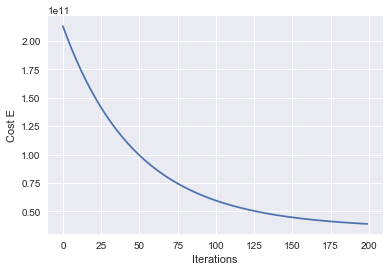

In [138]:
theta , Cost_E = GradientDescent(Xtrain, Ytrain,theta)
print('theta: ',theta.ravel())

plt.plot(Cost_E)
plt.ylabel('Cost/Error')
plt.xlabel('Iterations');

Check the curve, if cost goes down with each iteration then we are done with finding best theta for Linear Regression. But to evaluate our model, we need to test it on unseen dataset, if it performs well on unseen dataset then our model is good. We will explore this later on how to evaluate our model on unseen dataset. 

Now lets use builtin model

In [148]:
from sklearn.linear_model import SGDRegressor

In [192]:
train_data.head()

sqft_living  bedrooms     price
5268     -0.555180 -0.398728  495000.0
16909    -0.326531 -0.398728  635000.0
16123    -1.077805 -0.398728  382500.0
12181     0.141653  0.676469  382500.0
12617    -0.304755 -0.398728  670000.0

In [164]:
Xtrain=np.array(train_data[['sqft_living','bedrooms']])
Ytrain=np.array(train_data['price'])
                
Xtest=np.array(test_data[['sqft_living','bedrooms']])
Ytest=np.array(test_data['price'])

In [165]:
Xtrain.shape


(17290, 2)

In [166]:
model = SGDRegressor(n_iter=100,eta0=0.01,verbose=1)
model.fit(Xtrain, Ytrain)

-- Epoch 1
Norm: 295553.73, NNZs: 2, Bias: 535315.984427, T: 17290, Avg. loss: 36642086389.385689
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 298226.26, NNZs: 2, Bias: 545914.237703, T: 34580, Avg. loss: 34340498945.506241
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 293970.72, NNZs: 2, Bias: 544351.582946, T: 51870, Avg. loss: 34267425981.636864
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 280283.90, NNZs: 2, Bias: 531895.667992, T: 69160, Avg. loss: 34261221777.316383
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 288865.28, NNZs: 2, Bias: 537672.174197, T: 86450, Avg. loss: 34259512530.122215
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 284021.60, NNZs: 2, Bias: 548525.176143, T: 103740, Avg. loss: 34234917482.380573
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 311710.29, NNZs: 2, Bias: 540243.141860, T: 121030, Avg. loss: 34192026451.075375
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 287261.61, NNZs: 2, Bias: 544483.993690, T: 138320

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=100, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=1,
       warm_start=False)

In [167]:
model.predict(Xtrain)

array([399650.8824914 , 465676.23779579, 248735.78465281, ...,
       648031.98101742, 600284.66269143, 603428.72722973])

Lets visualize how it fits on training points

In [179]:
x_surf, y_surf = np.meshgrid(np.linspace(Xtrain[:,0].min(), Xtrain[:,0].max(), 100),np.linspace(Xtrain[:,1].min(), Xtrain[:,1].max(), 100))
onlyX = pd.DataFrame({'Sqft_living': x_surf.ravel(), 'bedrooms': y_surf.ravel()})
fittedY=model.predict(onlyX)

In [181]:
x_surf.shape

(100, 100)

In [ ]:
print(theta)

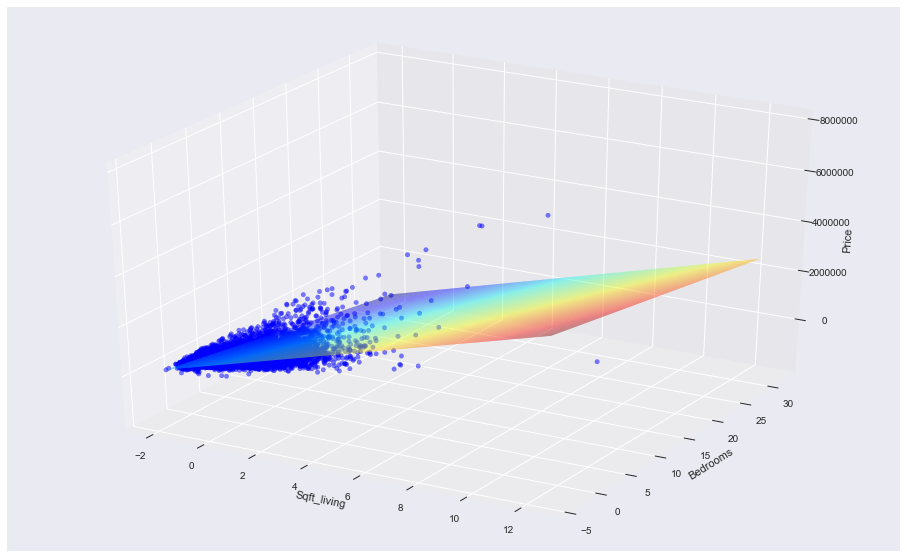

In [188]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtrain[:,0],Xtrain[:,1],Ytrain,c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax.set_xlabel('Sqft_living')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

Check on unseen dataset

In [189]:
model.predict(Xtest)

array([ 406525.36181944, 1323419.50650134,  409669.42635775, ...,
        333625.52718702,  204718.88111656,  421659.33425953])

In [190]:
Ytrain

array([495000., 635000., 382500., ..., 431000., 411000., 699900.])

We have seen how multivariate Linear Regression works, we can now train on any number of features in given data. 

We have also seen how  to write Regression code from scratch and also seen how to use builtin library sklearn.

